# Millenials and Investment: an Ongoing Exploration

In case you haven't heard, [millenials are killing everything](http://www.businessinsider.com/millennials-are-killing-list-2017-8/#diamonds-12) from diamonds to department stores to designer crap to grocery chains.

Why? Sure, the recession had an impact. But also, millenials pay more attention to ethics than many multinational corporations bargain for. They cite the blood diamond trade as a major reason to spring for non-traditional engagement rings. They opt for grocery providers that can tell them where their food is coming from and under what conditions it was produced. They're ditching the fast fashion industry for higher-priced items purchased secondhand on sites like Poshmark and ThreadUp. 

And as millenials reach the age where they might accrue some savings, it makes sense that they would care about where that is going, too. In addition to millenial attendance at the NoDAPL protests, we saw thousands of millenials divest from Western Union, Bank of America, and other banks that loaned money to the project. Maybe megacorps won't change their tunes because a few thousand people stood in a field to get mowed down by water cannons, but they're more likely to sit up and listen when those same people take their hard-earned doll hairs to another playhouse.

So we see that millenials are surveying their options to spend and save according to their values. What about investing? Any personal finance 101 that isn't taught by a financial advisor will recommend a low cost index as the place to stick extra money so it can grow with the market. Most index funds, including the most recommended one (Vanguard), decide their investments via index-matching: matching their holdings to the S&P500 by market cap, with no other variables. Thing is, plenty of investors are expressing interest in taking ethical considerations into account. Some portfolios do this by blanket blocking investments in certain industries like tobacco or porn. Other more advanced optsions, like Betterment's AutoSRI portfolio, use actual ESG data to determine where they invest the money. There isn't (yet) a fully customizable option to allow folks to automatically invest their funds based on a checklist of their individual values. For a while, I've thought about building a toy version of what that might look like. 

When I talk about the idea with friends and relatives, I get the following objection: 'What about the returns?' Touche. Nobody wants to lose out on their potential earnings. At first, I figured I'd build a tolerance into the system that allowed investors to say 'These are my values, but please don't invest in a way that will trail general market performance by more than x percent.' The algorithm would then predict stock performance for each company, somehow blend that with ESG rating, and come up with a combined weight for divvying up investment money.

Before I build that, though, I need to test the assumption that high ESG ratings *do* correlate negatively with returns. If they don't, there's no need for the tolerance measure in the first place.

I'm not the first person to run correlations along these lines. Dorfleitner, Utz, and Wimmer published a paper on this just last year. [Their analysis](http://www.tandfonline.com/doi/full/10.1080/20430795.2017.1403272?scroll=top&needAccess=true) suggests that higher corporate social responsibility ratings *increase* returns over a long period of time ("long" being a 12 year period from 2002-2014). They even identify three specific areas that correlate with higher than average returns: emission and resource reduction, workforce, and society. So in my exploration, I'll dig into some specific CSR breakdowns with the data I have on S&P 500 companies. 

In [1]:
import pandas as pd
import numpy as np

## Correlating KLD ESG Ratings to Stock Performance, 1990-2005

Let's determine whether we notice any correlation between companies' environmental, social, and governmental ratings and their stock performance. 

### First, we pull in the ESG data. 

These come from KLD and are now distributed by MSGI. I pulled them from an academic database. Don't rerun this notebook because I didn't push the actual data to Github, on account of it is large and on account of both data providers ask corporations to pay for the data. So I'm not going to undermine that.

In [2]:
y91 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1991 HistoricalSpreadsheet_STATS.xls')
y92 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1992 HistoricalSpreadsheet_STATS.xls')
y93 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1993 HistoricalSpreadsheet_STATS.xls')
y94 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1994 HistoricalSpreadsheet_STATS.xls')
y95 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1995 HistoricalSpreadsheet_STATS.xls')
y96 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1996 HistoricalSpreadsheet_STATS.xls')
y97 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1997 HistoricalSpreadsheet_STATS.xls')
y98 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1998 HistoricalSpreadsheet_STATS.xls')
y99 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1999 HistoricalSpreadsheet_STATS.xls')

nineties = [y91, y92, y93, y94, y95, y96, y97, y98, y99]

In [3]:
y00 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2000 HistoricalSpreadsheet_STATS.xls')
y01 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2001 HistoricalSpreadsheet_STATS.xls')
y02 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2002 HistoricalSpreadsheet_STATS.xls')
y03 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2003 HistoricalSpreadsheet_STATS.xls')
y04 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2004 HistoricalSpreadsheet_STATS.xls')
y05 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2005 Historical Spreadsheet_STATS.xls') #wth KLD
y06 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2006 Historical Spreadsheet_STATS.xls')
y07 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2007 HistoricalSpreadsheet_STATS.xls')
y08 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2008 HistoricalSpreadsheet_STATS.xls')
y09 = pd.read_excel('../stockproject/12231046.2000-2009.stats/2009 HistoricalSpreadsheet_STATS.xls')


two_thousands = [y00, y01, y02, y03, y04]

I wanted to run 1990-2009, but evidently starting in 2005 these spreadsheets no longer represent whether a company was in the S&P500 in the same way. That's okay: we can do this for a fifteen-year period wrangle in more data later if we would like to see a longer period of time.

Now let's pull out the companies that belong to the S&P 500. We'll begin by examining their ESG scores on four metrics: employment policy strengths, employment policy concerns, environmental impact strengths, and environmental impact concerns. These companies get a score of zero (0) or one (1) each year on each of several sub-metrics. For example, employment policy strengths include specific scores for workplace safety, compensation, union management, et cetera. 

We're going to sum up all of the sub-metrics for each metric per company, and then we're going to sum that company's total scores in that metric across our fifteen year time span. We'll end up with a company score of cumulative strengths and concerns in employment and environmental practices over the course of the fifteen years. 

In [4]:
twenty_years = nineties + two_thousands

def filter_500(df):
    return df[df['SP500'] == True]

sp500_90s = []    
for data in twenty_years:
  sp500_90s.append(filter_500(data))

def aggregate_columns_for(category, dataframe):
    relevant_columns = [column_name for column_name in dataframe.columns.values if column_name.startswith(category)]
    return dataframe[relevant_columns].sum(axis=1)
        

aggregate_data = pd.concat(sp500_90s)
aggregate_data['EMP-str-sum'] = aggregate_columns_for('EMP-str', aggregate_data)
aggregate_data['EMP-con-sum'] = aggregate_columns_for('EMP-con', aggregate_data)
aggregate_data['ENV-str-sum'] = aggregate_columns_for('ENV-str', aggregate_data)
aggregate_data['ENV-con-sum'] = aggregate_columns_for('ENV-con', aggregate_data)

aggregate_data.head(10)

,ALC-con-#,ALC-con-A,ALC-con-X,BMS,CGOV-con-#,CGOV-con-B,CGOV-con-F,CGOV-con-G,CGOV-con-H,CGOV-con-I,...,Russell2000,SP500,TOB-con-#,TOB-con-A,TOB-con-X,Ticker,EMP-str-sum,EMP-con-sum,ENV-str-sum,ENV-con-sum
0,0,0,NR,NaN,0,0,0,NR,NR,NR,...,NaN,True,0,0,NR,ABT,0,0,2,2
1,0,0,NR,NaN,0,0,0,NR,NR,NR,...,NaN,True,0,0,NR,AMT,0,0,0,0
3,0,0,NR,NaN,0,0,0,NR,NR,NR,...,NaN,True,0,0,NR,AMD,2,0,0,2
4,0,0,NR,NaN,0,0,0,NR,NR,NR,...,NaN,True,0,0,NR,AET,2,0,0,0
6,0,0,NR,NaN,0,0,0,NR,NR,NR,...,NaN,True,0,0,NR,AHM,0,0,0,0
7,0,0,NR,NaN,0,0,0,NR,NR,NR,...,NaN,True,0,0,NR,APD,0,0,2,4
9,0,0,NR,NaN,0,0,0,NR,NR,NR,...,NaN,True,0,0,NR,ACV,0,0,0,0
10,0,0,NR,NaN,0,0,0,NR,NR,NR,...,NaN,True,0,0,NR,ABS,2,2,0,0
11,0,0,NR,NaN,0,0,0,NR,NR,NR,...,NaN,True,0,0,NR,AL,0,0,2,2
12,0,0,NR,NaN,0,0,0,NR,NR,NR,...,NaN,True,0,0,NR,ASN,0,0,0,0


OK, so here's our data. Let's take a look at this data and make sure we're getting what we want: a sum of the ESG scores on a company-by-company basis.

In [5]:
def sum_scores_for(dataframe, esg_marker):
    grouping = dataframe.groupby(['Ticker'])[esg_marker].sum()
    return pd.DataFrame({esg_marker : grouping}).reset_index()

In [6]:
esg_marker_data = sum_scores_for(aggregate_data, 'EMP-str-sum')
esg_marker_data.head()

,Ticker,EMP-str-sum
0,A,16
1,AA,48
2,AAL,2
3,AAPL,16
4,ABC,0


Ah, these sums look like what we would expect to see!

In [7]:
esg_marker_data['EMP-con-sum'] = sum_scores_for(aggregate_data, 'EMP-con-sum')['EMP-con-sum']
esg_marker_data['ENV-str-sum'] = sum_scores_for(aggregate_data, 'ENV-str-sum')['ENV-str-sum']
esg_marker_data['ENV-con-sum'] = sum_scores_for(aggregate_data, 'ENV-con-sum')['ENV-con-sum']

In [8]:
esg_marker_data.sort_values(by=['EMP-con-sum'], ascending=False).head()

,Ticker,EMP-str-sum,EMP-con-sum,ENV-str-sum,ENV-con-sum
150,CAT,32,50,2,26
847,UNP,8,38,4,56
841,UIS,0,38,8,0
501,LPX,2,38,16,52
649,PD,0,35,0,60


### Second, we pull in stock performance data.

This data contains stock returns by quarter for S&P500 companies dating back to 1979. We'll pull the columns for the '90s for now.

In [9]:
price_data = pd.read_excel('../stockproject/Cleaned_Researcher_Dataset.xlsx')

In [10]:
new_header = price_data.iloc[0] #grab the first row for the header
content = price_data[1:] #take the data less the header row
content.columns = new_header #set the header row as the df header
content.head()

tickers = content.iloc[:,0:2]
tickers.columns = list(new_header)[0:2]

dates = content.iloc[:,45:106]
dates.columns = list(new_header)[45:106]

result = pd.concat([tickers, dates], axis=1)
result.head()

,Ticker,Company Name,1989-12-31 00:00:00,1990-03-31 00:00:00,1990-06-30 00:00:00,1990-09-30 00:00:00,1990-12-31 00:00:00,1991-03-31 00:00:00,1991-06-30 00:00:00,1991-09-30 00:00:00,...,2002-09-30 00:00:00,2002-12-31 00:00:00,2003-03-31 00:00:00,2003-06-30 00:00:00,2003-09-30 00:00:00,2003-12-31 00:00:00,2004-03-31 00:00:00,2004-06-30 00:00:00,2004-09-30 00:00:00,2004-12-31 00:00:00
1,A,Agilent Technologies Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.06,17.96,13.15,19.55,22.11,29.24,31.63,29.28,21.57,24.1
2,AA,Alcoa Inc,75,64.75,63.75,62.63,57.63,65.5,67.5,63.88,...,19.3,22.78,19.38,25.5,26.16,38,34.69,33.03,33.59,31.42
3,AAL,American Airlines Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAL (Alex),Alexander & Alexander,30.63,26.75,24.38,17.88,23.13,26.25,22.5,20.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AAP,Advance Auto Parts Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Third, we translate these stock prices into returns.

I want a metric that I can use to compare all the companies that a) belonged to the S&P 500 and b) earned some kind of KLD scores during the 1990-2005 period. Some companies only belong to the S&P500 for a subset of the years in question. We want a metric that will not penalize companies based on having spent less time in the S&P500, so a cumulative score won't work for us. I decided to calculate quarterly returns based on the stock prices. This fairly compares each company's stock performance during the period that an index-matching ETF would have held it, however long or short that was.

This is also nice because our mean function will only consider, for each company, those cells that have a number. So we don't have to do as much data skullduggery to get the equation functions to spit out something meaningful.

In [11]:
def quarter_return(start, end):
    if start == 0 or end == 0:
        return 0
    return end / start

#WARNING: This has to go column by column because the sequence in time matters.
#Such an iterative operation takes longer than async-per-column pandas operations.
#Expect this block of code to take several seconds to run.
raw_stock_prices = result
returns_df = raw_stock_prices[['Ticker', 'Company Name']]

#We cannot easily index the columsn by name
#because the column names are datetimes rather than strings,
#so we use column index instead.
for column_name in raw_stock_prices.iloc[:,2:]:
    loc = raw_stock_prices.columns.get_loc(column_name)
    this_column = raw_stock_prices.iloc[:,loc]
    next_col = loc + 1
    try:
        next_column = raw_stock_prices.iloc[:, next_col]

        temp_df = pd.concat([this_column, next_column], axis=1)
        temp_df.columns = ['a', 'b']
    
        returns_df['quarter_starting_' + column_name.strftime('%m/%d/%Y') + '_roi'] = (
        temp_df.apply(lambda row: quarter_return(row['a'], row['b']), axis=1))
    except:
        print('End of dataframe reached')

returns_df.head()

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


End of dataframe reached


,Ticker,Company Name,quarter_starting_12/31/1989_roi,quarter_starting_03/31/1990_roi,quarter_starting_06/30/1990_roi,quarter_starting_09/30/1990_roi,quarter_starting_12/31/1990_roi,quarter_starting_03/31/1991_roi,quarter_starting_06/30/1991_roi,quarter_starting_09/30/1991_roi,...,quarter_starting_06/30/2002_roi,quarter_starting_09/30/2002_roi,quarter_starting_12/31/2002_roi,quarter_starting_03/31/2003_roi,quarter_starting_06/30/2003_roi,quarter_starting_09/30/2003_roi,quarter_starting_12/31/2003_roi,quarter_starting_03/31/2004_roi,quarter_starting_06/30/2004_roi,quarter_starting_09/30/2004_roi
1,A,Agilent Technologies Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.552220,1.375191,0.732183,1.486692,1.130946,1.322479,1.081737,0.925703,0.736680,1.117293
2,AA,Alcoa Inc,0.863333,0.984556,0.982431,0.920166,1.136561,1.030534,0.94637,1.007827,...,0.582202,1.180311,0.850746,1.315789,1.025882,1.452599,0.912895,0.952148,1.016954,0.935397
3,AAL,American Airlines Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAL (Alex),Alexander & Alexander,0.873327,0.911402,0.733388,1.293624,1.134890,0.857143,0.92800,0.981801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AAP,Advance Auto Parts Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Fourth, we combine the data into one dataframe.

We find all the companies for which we have both stock price data and ESG data, and we put the information together.

In [12]:
tickers = list(esg_marker_data["Ticker"]) #get all the company tickers for which we have esg data
prices_for_esg_companies = returns_df[returns_df["Ticker"].isin(tickers)] #get the stock data from companies in that list
esg_marker_data.head()

,Ticker,EMP-str-sum,EMP-con-sum,ENV-str-sum,ENV-con-sum
0,A,16,16,0,0
1,AA,48,2,30,80
2,AAL,2,0,0,0
3,AAPL,16,14,4,0
4,ABC,0,2,0,0


In [13]:
relevant_esgs = esg_marker_data[esg_marker_data["Ticker"].isin(tickers)]
relevant_esgs = relevant_esgs.fillna(0.0) #no esg score to zero esg score
relevant_esgs['EMP-str-sum'].unique()

array([16, 48,  2,  0, 22, 12, 18,  8,  6,  4, 28, 10, 20, 14, 36, 26, 30,
       24,  1, 42, 32, 11, 44, 52, 38, 13, 43, 54,  9, 72, 55,  7, 34, 40,
       60,  5, 25, 46, 58, 33, 50, 29,  3, 70, 62])

In [14]:
all_data = pd.concat([relevant_esgs, prices_for_esg_companies.iloc[:,1:]], axis = 1) #put the esg and stock data in one dataframe
all_data = all_data[np.isfinite(all_data['EMP-str-sum'])]

In [15]:
all_data['EMP-str-sum'].unique() #making sure the list of EMP-str-sum values is the same before and after concatenation to ensure that all the esg data made it over

array([ 16.,  48.,   2.,   0.,  22.,  12.,  18.,   8.,   6.,   4.,  28.,
        10.,  20.,  14.,  36.,  26.,  30.,  24.,   1.,  42.,  32.,  11.,
        44.,  52.,  38.,  13.,  43.,  54.,   9.,  72.,  55.,   7.,  34.,
        40.,  60.,   5.,  25.,  46.,  58.,  33.,  50.,  29.,   3.,  70.,
        62.])

### Fifth, we look at the data.

In [16]:
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline  

Our research question, recall, is this: do companies with low aggregated ESG scores have better stock performance than companies with high aggregated ESG scores? 

We have so far calculated the return on investment of every stock, every quarter. We're not ready to use that data, though. If we use each return individually, we'll end up comparing each example (that is, each company) _multiple times_. Multiple comparisons in statistics gives you more opportunities to end up with false positives because it gives you more cracks at hitting that 5% probability lottery (if p-0.05) of your results being a fluke.

Instead, we want a way to generalize over all of its quarterly returns for those quarters in which each stock had a return.

Easy! Take an average, right? Well, not quite. 

First of all, an average skews toward big outliers. If most quarters showed an ROI of 1.01 and then one quarter has an ROI of 2, the average will skew much higher than 1.01.

Pursuant to that, smaller numbers of measurements skew toward the extremes. So if a company only has three returns, each individual return affects the average a lot. That means, if one of the three is super high, the whole average will be super high. Comparatively, if a company has 200 returns and one of them is an outlier, it won't drag the average nearly as far. In datasets where examples possess a different number of measurements, the highest and lowest values for the target variable often come from samples with few measurements.

We are in a prime position to encounter that gotcha, because some of these companies are much more measured (many more quarterly returns) than others. 

So instead, we're going to do something that might look a little weird.

#### Confidence Intervals

Instead of going off the _average_ of our set of returns, we'll take the confidence interval for it. A confidence interval attempts to take into account the fact that our data doesn't quite match the real world: it samples the real world such that we can attempt to represent the real world in studies. So the "true average" of something might not look like the average of our measurements of it, and the fewer measurements we have the less sure we can be of the discrepancy. A confidence interval takes our average and says 'based on this average, the _true_ average lies between this number and this number with this probability.' 

So, for our stock return measurements, we'll get the confidence interval for each company. For companies with few measurements, that confidence interval will be wide. For companies with many measurements, it will be more narrow. We'll then sample that _pessimistically_ and compare the _bottoms_ of all the companies' confidence intervals. 

It's worth noting that this is going to give us a very low number for companies with few returns and _without_ a high outlier. We'll address that as well.

In [17]:
# Calculate average roi
returns = all_data[all_data.columns.difference(['EMP-str-sum', 'EMP-con-sum','ENV-str-sum','ENV-con-sum','Ticker','Company Name'])]
returns.head()

,quarter_starting_03/31/1990_roi,quarter_starting_03/31/1991_roi,quarter_starting_03/31/1992_roi,quarter_starting_03/31/1993_roi,quarter_starting_03/31/1994_roi,quarter_starting_03/31/1995_roi,quarter_starting_03/31/1996_roi,quarter_starting_03/31/1997_roi,quarter_starting_03/31/1998_roi,quarter_starting_03/31/1999_roi,...,quarter_starting_12/31/1994_roi,quarter_starting_12/31/1995_roi,quarter_starting_12/31/1996_roi,quarter_starting_12/31/1997_roi,quarter_starting_12/31/1998_roi,quarter_starting_12/31/1999_roi,quarter_starting_12/31/2000_roi,quarter_starting_12/31/2001_roi,quarter_starting_12/31/2002_roi,quarter_starting_12/31/2003_roi
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.561279,1.226236,0.732183,1.081737
2,0.984556,1.030534,1.076312,1.085271,1.020941,1.207952,0.916174,1.108529,0.958291,1.502306,...,0.479049,1.18438,1.066667,0.977693,0.552441,0.846386,1.073134,1.061603,0.850746,0.912895
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
def confidence_interval_for(samples=[], confidence=0.95):
    sample_size = len(samples)
    degrees_freedom = sample_size - 1
    outlier_tails = (1.0 - confidence) / 2.0
    t_distribution_number = -1 * t.ppf(outlier_tails, degrees_freedom)

    step_1 = np.std(samples)/math.sqrt(sample_size) 
    step_2 = step_1 * t_distribution_number
    
    low_end = np.mean(samples) - step_2
    high_end = np.mean(samples) + step_2

    return low_end, high_end

In [19]:
import math
from scipy.stats import t
import numpy as np

lower_conf_intervals = []
upper_conf_intervals = []

for (idx, row) in returns.iterrows():
    maybe_measurements = row.tolist()
    measurements = [float(x) for x in maybe_measurements if (math.isnan(float(x)) == False)]
    bottom, top = confidence_interval_for(measurements)
    lower_conf_intervals.append(bottom)
    upper_conf_intervals.append(top)

//anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
//anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:94: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
//anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
//anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
//anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [20]:
all_data['avg_quarterly_roi'] = returns.mean(axis=1, skipna=True)
all_data['num_measurements'] = returns.count(axis=1)
all_data['lower_conf_interval'] = lower_conf_intervals
all_data['upper_conf_interval'] = upper_conf_intervals

all_data.head(10)

,Ticker,EMP-str-sum,EMP-con-sum,ENV-str-sum,ENV-con-sum,Company Name,quarter_starting_12/31/1989_roi,quarter_starting_03/31/1990_roi,quarter_starting_06/30/1990_roi,quarter_starting_09/30/1990_roi,...,quarter_starting_06/30/2003_roi,quarter_starting_09/30/2003_roi,quarter_starting_12/31/2003_roi,quarter_starting_03/31/2004_roi,quarter_starting_06/30/2004_roi,quarter_starting_09/30/2004_roi,avg_quarterly_roi,num_measurements,lower_conf_interval,upper_conf_interval
0,A,16.0,16.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,AA,48.0,2.0,30.0,80.0,Agilent Technologies Inc.,NaN,NaN,NaN,NaN,...,1.130946,1.322479,1.081737,0.925703,0.736680,1.117293,0.990271,18,0.836893,1.143650
2,AAL,2.0,0.0,0.0,0.0,Alcoa Inc,0.863333,0.984556,0.982431,0.920166,...,1.025882,1.452599,0.912895,0.952148,1.016954,0.935397,1.007726,60,0.957651,1.057801
3,AAPL,16.0,14.0,4.0,0.0,American Airlines Group,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
4,ABC,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
5,ABI,22.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
6,ABK,12.0,0.0,0.0,0.0,Apple Inc.,1.141844,1.111801,0.648045,1.482759,...,1.087093,1.031371,1.265325,1.203402,1.190842,1.661935,1.060814,60,0.977459,1.144170
7,ABS,18.0,29.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
8,ABT,0.0,2.0,2.0,38.0,AmerisourceBergen Corp.,NaN,NaN,NaN,NaN,...,0.779380,1.038853,0.973820,1.093270,0.898461,1.092534,0.995946,13,0.908448,1.083444
9,ABX,8.0,6.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


Before we go on, let's talk statistical power.

The statistical power of a dataset describes the likelihood that you will be able to _detect_ a meaningful difference with this data given that the difference _is there_. It's an important precursor step to data analysis because it determines your ability to find the effect you're looking for.

Calculating statistical power is a little complicated, and it's generally a good idea to get someone who knows what they're doing to help you. I'm not confident in my ability to evaluate statistical power calculation strategies yet, but I figured I'd start with the all-around method and used [this online calculator](https://www.dssresearch.com/KnowledgeCenter/toolkitcalculators/statisticalpowercalculators.aspx).

I performed a one-tail statistical power test. I took the mean of the bottom end of confidence intervals on stock returns—0.92. Suppose this were only the mean for companies with favorable ESG scores, and suppose that companies with unfavorable ESG scores had a marginally but meaningfully higher quarterly return of 0.93. So 0.92 is my sample average and 0.93 is my test value.

The sample size is how many examples we have: 1087.

Our standard deviation for sample is...

In [21]:
all_data['lower_conf_interval'].describe()

count    496.000000
mean       0.926034
std        0.141578
min       -1.307858
25%        0.923896
50%        0.959134
75%        0.975510
max        1.041034
Name: lower_conf_interval, dtype: float64

...0.12. so we plug that in.

I left the confidence level at 5% and ran the calculator.

My result: 86.5%

That's the probability, if there is a 1% difference or more between stock returns for companies with favorable and unfavorable ESG scores, we have an 86.5% chance of detecting it. Statistical power expectations vary, but a rule of thumb (and standard practice at some more rigorous scientific journals) is to expect a statistical power of 80% or higher to take a study seriously. 


OK, time to make some pictures! Let's plot our ESG score sums against average roi and see if we notice any trends.

(925, 70)

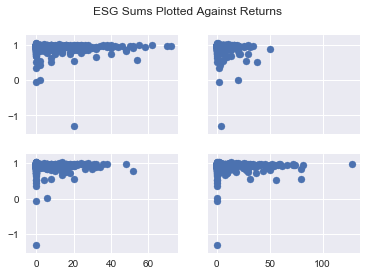

In [22]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
f.suptitle('ESG Sums Plotted Against Returns')
ax1.scatter(x=all_data['EMP-str-sum'], y=all_data['lower_conf_interval'])
ax2.scatter(x=all_data['EMP-con-sum'], y=all_data['lower_conf_interval'])
ax3.scatter(x=all_data['ENV-str-sum'], y=all_data['lower_conf_interval'])
ax4.scatter(x=all_data['ENV-con-sum'], y=all_data['lower_conf_interval'])
all_data.shape

We have a couple of really low ones on those charts. Let's look at them:

In [23]:
all_data[['Company Name','lower_conf_interval', 'num_measurements']].sort('lower_conf_interval').head(10)

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Company Name,lower_conf_interval,num_measurements
480,Fred Meyer Inc.,-1.307858,2
164,BMC Software,-0.065493,24
260,CIT Group Inc.,0.014914,2
641,Immunex Corp.,0.348569,3
387,Datapoint Corp,0.433194,5
847,Mylan Inc.,0.516272,2
575,HBO & Co.,0.521745,4
28,Adaptec Inc.,0.540784,5
573,Harcourt Brace Jovanovich,0.545521,7
292,Conexant Systems,0.559627,8


We spoke a little bit earlier about the way our measuring strategy would especially penalize companies with only a few measurements. We're seeing that here. Out of these bottom 10 scores for the lower end of stock return confidence intervals, only one has more than 7 data points. Compare this to the mean number of measurements:

In [24]:
all_data['num_measurements'].mean()

19.932972972972973

But there's another thing to note about this data: five of the values are _negative_. These scores are low, yes, but a negative value for a stock return does not make sense. The value of a stock can drop to zero, but it does not turn into debt to the company owed by the stockholders. The lowest a stock price can drop is to zero. To accurately represent that, we'll clip these values at zero.

In [25]:
all_data['lower_conf_interval'] = all_data['lower_conf_interval'].clip_lower(0)

Let's check the means too to make sure we don't have negative values in the means:

In [26]:
all_data[['Company Name','avg_quarterly_roi', 'num_measurements']].sort('avg_quarterly_roi').head(10)

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Company Name,avg_quarterly_roi,num_measurements
28,Adaptec Inc.,0.720171,5
573,Harcourt Brace Jovanovich,0.781262,7
682,JWP Inc.,0.833895,12
292,Conexant Systems,0.874049,8
575,HBO & Co.,0.913608,4
166,Battle Mountain Gold Co,0.915304,11
228,Concord EFS Inc.,0.922711,10
879,NL Industries,0.925132,16
309,Calpine Corp.,0.930743,16
861,New Century Energies,0.932621,6


Cool: we don't. This means that none of the upper ends of the confidence intervals will have negative values either, as the upper end of the confidence interval is always higher than the mean on which it is based.

Let's check out our plot again with those adjustments:

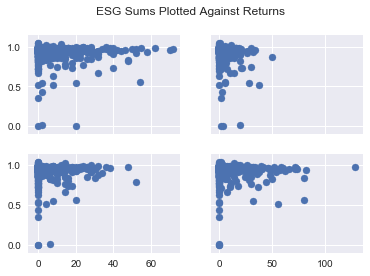

In [27]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
f.suptitle('ESG Sums Plotted Against Returns')
ax1.scatter(x=all_data['EMP-str-sum'], y=all_data['lower_conf_interval'])
ax2.scatter(x=all_data['EMP-con-sum'], y=all_data['lower_conf_interval'])
ax3.scatter(x=all_data['ENV-str-sum'], y=all_data['lower_conf_interval'])
ax4.scatter(x=all_data['ENV-con-sum'], y=all_data['lower_conf_interval'])

Let's look at the general trends of the returns. They look pretty flat to me: I don't see an upward or downward trend in quarterly ROI based on any of the 4 ESG metrics.

Let's dig a little deeper and see if the numbers themselves support that.

In [28]:
# list(set(all_data['EMP-str-sum']))

The thing about a lot of our data is that it skews heavily toward one side or the other. For example, there are a lot more companies with low employment policy strength scores than high ones. How do we account for this when we do our aggregations? In the code below, I try to separate strata of ESG scores into buckets of similar size. That means a lot of the higher scores get bucketed together, while zero (0) or one(1) get their own buckets.

Here's a question though—why do buckets at all? Why not run a linear regressor on the data as-is and call it good?

Good question! A regressor can frequently be a preferable option to drawing arbitrary distinctions in continuous data. This isn't exaclty continuous data as the ESG aggregations are all natural numbers, _but_ that is not the reason for the buckets. The reason for the buckets is to have each of our aggregated data points come from roughly the same number of data examples. If we run a regressor, the bottom of the regressor represents a ton of data points, and as we go higher it represents fewer and fewer data points such that the expected value up there means very little. 

I'd be very concerned to artificially divide this data into only _two_ buckets such that points close to the arbitrary division get lumped in with very different means. So we'll break it into as many buckets as we reasonably can such that each bucket of data points contains data points that are roughly similar to one another in their ESG scores.

In [29]:
def buckets(score):
    if score == 0.0:
        val = '0' 
    if 0.0 < score < 2.0:
        val = '1' 
    if 1.0 < score < 4.0:
        val = '2-3' 
    if 3.0 < score < 6.0:
        val = '4-5' 
    if 5.0 < score < 8.0:
        val = '6-7'
    if 7.0 < score < 11.0:
        val = '8-10'
    if 10.0 < score:
        val = 'Above 11' 
    return val

esg_sum_zero = all_data[all_data['EMP-str-sum'] == 0.0]
twenty_examples = esg_sum_zero.sample(20)

esg_sum_above_zero = all_data[all_data['EMP-str-sum'] > 0.0]

emp_str_sum = pd.concat([esg_sum_above_zero, twenty_examples])
emp_str_sum.head()

emp_str_sum['emp_str_sum_grouping'] = emp_str_sum['EMP-str-sum'].apply(buckets)
emp_str_sum.head()

,Ticker,EMP-str-sum,EMP-con-sum,ENV-str-sum,ENV-con-sum,Company Name,quarter_starting_12/31/1989_roi,quarter_starting_03/31/1990_roi,quarter_starting_06/30/1990_roi,quarter_starting_09/30/1990_roi,...,quarter_starting_09/30/2003_roi,quarter_starting_12/31/2003_roi,quarter_starting_03/31/2004_roi,quarter_starting_06/30/2004_roi,quarter_starting_09/30/2004_roi,avg_quarterly_roi,num_measurements,lower_conf_interval,upper_conf_interval,emp_str_sum_grouping
0,A,16.0,16.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,Above 11
1,AA,48.0,2.0,30.0,80.0,Agilent Technologies Inc.,NaN,NaN,NaN,NaN,...,1.322479,1.081737,0.925703,0.736680,1.117293,0.990271,18,0.836893,1.143650,Above 11
2,AAL,2.0,0.0,0.0,0.0,Alcoa Inc,0.863333,0.984556,0.982431,0.920166,...,1.452599,0.912895,0.952148,1.016954,0.935397,1.007726,60,0.957651,1.057801,2-3
3,AAPL,16.0,14.0,4.0,0.0,American Airlines Group,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,Above 11
5,ABI,22.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,Above 11


And here are our initial results for employment policy strength scores and quarterly ROIs!

In [30]:
emp_str_sum_groupby = emp_str_sum.groupby(['emp_str_sum_grouping']).agg({'lower_conf_interval': ['count','mean','std']}).reset_index()
emp_str_sum_groupby.sort_values('emp_str_sum_grouping')

emp_str_sum_grouping lower_conf_interval                    
                                     count      mean       std
0                    0                  12  0.948257  0.075293
1                    1                   6  0.944834  0.045003
2                  2-3                  41  0.904087  0.178948
3                  4-5                  31  0.953567  0.044308
4                  6-7                  23  0.932946  0.054780
5                 8-10                  42  0.929509  0.094077
6             Above 11                 128  0.925101  0.112919

My buckets are not perfectly the same sizes, but the means are not orders of magnitude apart. They're all in the 0.91-0.94 range, whether the company had a very high employment policy strength score or a sorry zero. 

In [42]:
emp_str = emp_str_sum_groupby['emp_str_sum_grouping']
emp_str_qtrly_roi = emp_str_sum_groupby['lower_conf_interval']['mean']
annual_view = pd.concat([emp_str, qtrly_roi], axis=1).reset_index()
annual_view.columns = ['index','emp_str_sum_grouping', 'low_quarterly_estimate_roi']
annual_view

,index,emp_str_sum_grouping,low_quarterly_estimate_roi
0,0,0,0.948257
1,1,1,0.944834
2,2,2-3,0.904087
3,3,4-5,0.953567
4,4,6-7,0.932946
5,5,8-10,0.929509
6,6,Above 11,0.925101


Unfortunately each of the data have distinct distributions of values, which means that it's not trivial to modularize the bucketing strategy. we have to bucket them all differently to get roughly equal buckets. So we're going to be writing similar code several times over here. Were we doing this analysis continuously in, say, an app, we would find a better way to do this.

In [43]:
def buckets(score):
    if score == 0.0:
        val = '0' 
    if 0.0 < score < 3.0:
        val = '1-2' 
    if 2.0 < score < 5.0:
        val = '3-4'
    if 4.0 < score:
        val = '5 and up'
    return val


esg_sum_zero = all_data[all_data['EMP-con-sum'] == 0.0]
eighteen_examples = esg_sum_zero.sample(18)

esg_sum_above_zero = all_data[all_data['EMP-con-sum'] > 0.0]
emp_con_sum = pd.concat([esg_sum_above_zero, eighteen_examples])

emp_con_sum['emp_con_sum_grouping'] = emp_con_sum['EMP-con-sum'].apply(buckets)
emp_con_sum.head()

,Ticker,EMP-str-sum,EMP-con-sum,ENV-str-sum,ENV-con-sum,Company Name,quarter_starting_12/31/1989_roi,quarter_starting_03/31/1990_roi,quarter_starting_06/30/1990_roi,quarter_starting_09/30/1990_roi,...,quarter_starting_12/31/2003_roi,quarter_starting_03/31/2004_roi,quarter_starting_06/30/2004_roi,quarter_starting_09/30/2004_roi,avg_quarterly_roi,num_measurements,lower_conf_interval,upper_conf_interval,env_con_sum_grouping,emp_con_sum_grouping
0,A,16.0,16.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,5 and up
1,AA,48.0,2.0,30.0,80.0,Agilent Technologies Inc.,NaN,NaN,NaN,NaN,...,1.081737,0.925703,0.73668,1.117293,0.990271,18,0.836893,1.14365,Above 21,1-2
3,AAPL,16.0,14.0,4.0,0.0,American Airlines Group,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,5 and up
4,ABC,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,1-2
5,ABI,22.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,1-2


In [44]:
emp_con_sum_groupby = emp_con_sum.groupby(['emp_con_sum_grouping'])[['lower_conf_interval']].agg(['count', 'mean','std']).reset_index()
emp_con_sum_groupby.sort_values('emp_con_sum_grouping')

emp_con_sum_grouping lower_conf_interval                    
                                     count      mean       std
0                    0                  14  0.913190  0.091893
1                  1-2                 104  0.926496  0.121147
2                  3-4                  52  0.911765  0.156385
3             5 and up                 149  0.921486  0.117073

In [45]:
emp_con = emp_con_sum_groupby['emp_con_sum_grouping']
emp_con_qtrly_roi = emp_con_sum_groupby['lower_conf_interval']['mean']
annual_view = pd.concat([emp_con, emp_con_qtrly_roi], axis=1).reset_index()
annual_view.columns = ['index','emp_con_sum_grouping', 'low_quarterly_estimate_roi']
annual_view

,index,emp_con_sum_grouping,low_quarterly_estimate_roi
0,0,0,0.913190
1,1,1-2,0.926496
2,2,3-4,0.911765
3,3,5 and up,0.921486


Especially uneven bucketing here, unfortunately. I could take a random sampling of the larger buckets. Maybe in the next round.

Anyway, this is employment concerns (scores for treating workers poorly).

In [46]:
esg_sum_zero = all_data[all_data['ENV-str-sum'] == 0.0]
twenty_examples = esg_sum_zero.sample(20)

esg_sum_above_zero = all_data[all_data['ENV-str-sum'] > 0.0]

env_str_sum = pd.concat([esg_sum_above_zero, twenty_examples])

def buckets(score):
    if score == 0.0:
        val = '0' 
    if 0.0 < score < 4.0:
        val = '1-3' 
    if 3.0 < score < 10.0:
        val = '4-9'
    if 9.0 < score:
        val = '9 and up'
    return val

env_str_sum['env_str_sum_grouping'] = env_str_sum['ENV-str-sum'].apply(buckets)
env_str_sum.head()

,Ticker,EMP-str-sum,EMP-con-sum,ENV-str-sum,ENV-con-sum,Company Name,quarter_starting_12/31/1989_roi,quarter_starting_03/31/1990_roi,quarter_starting_06/30/1990_roi,quarter_starting_09/30/1990_roi,...,quarter_starting_12/31/2003_roi,quarter_starting_03/31/2004_roi,quarter_starting_06/30/2004_roi,quarter_starting_09/30/2004_roi,avg_quarterly_roi,num_measurements,lower_conf_interval,upper_conf_interval,env_con_sum_grouping,env_str_sum_grouping
1,AA,48.0,2.0,30.0,80.0,Agilent Technologies Inc.,NaN,NaN,NaN,NaN,...,1.081737,0.925703,0.736680,1.117293,0.990271,18,0.836893,1.143650,Above 21,9 and up
3,AAPL,16.0,14.0,4.0,0.0,American Airlines Group,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,4-9
8,ABT,0.0,2.0,2.0,38.0,AmerisourceBergen Corp.,NaN,NaN,NaN,NaN,...,0.973820,1.093270,0.898461,1.092534,0.995946,13,0.908448,1.083444,Above 21,1-3
11,ACCOB,6.0,9.0,24.0,28.0,Ambac Financial Group Inc.,NaN,NaN,NaN,NaN,...,1.063266,0.995392,1.088644,1.027267,1.027596,16,0.968332,1.086859,Above 21,9 and up
25,AEP,2.0,1.0,4.0,48.0,Analog Devices Inc.,NaN,NaN,NaN,NaN,...,1.051698,0.980629,0.823704,0.952037,0.979946,20,0.879106,1.080787,Above 21,4-9


In [47]:
env_str_sum_groupby = env_str_sum.groupby(['env_str_sum_grouping'])[['lower_conf_interval']].agg(['count', 'mean','std']).reset_index()
env_str_sum_groupby.sort_values('env_str_sum_grouping')

env_str_sum_grouping lower_conf_interval                    
                                     count      mean       std
0                    0                  11  0.791156  0.323166
1                  1-3                  18  0.948638  0.036978
2                  4-9                  46  0.909920  0.165861
3             9 and up                  84  0.926077  0.078671

In [48]:
env_str = env_str_sum_groupby['env_str_sum_grouping']
env_str_qtrly_roi = env_str_sum_groupby['lower_conf_interval']['mean']
annual_view = pd.concat([env_str, env_str_qtrly_roi], axis=1).reset_index()
annual_view.columns = ['index','env_str_sum_grouping', 'low_quarterly_estimate_roi']
annual_view

,index,env_str_sum_grouping,low_quarterly_estimate_roi
0,0,0,0.791156
1,1,1-3,0.948638
2,2,4-9,0.909920
3,3,9 and up,0.926077


Here we have environmental impact strength. I could stratify these buckets more to get a more granular view. 

In [49]:
env_con_sum = all_data

def buckets(score):
    val = score
    if score == 0.0:
        val = '0' 
    if score == 1.0:
        val = '1' 
    if score == 2.0:
        val = '2' 
    if 2.0 < score < 5.0:
        val = '3-4'
    if 4.0 < score < 8.0:
        val = '5-7'
    if 7.0 < score < 13.0:
        val = '8-12'
    if 12.0 < score < 22.0:
        val = 'Above 12, below 21'
    if 21.0 < score:
        val = 'Above 21'
    return val

env_con_sum['env_con_sum_grouping'] = env_con_sum['ENV-con-sum'].apply(buckets)
env_con_sum.head()

,Ticker,EMP-str-sum,EMP-con-sum,ENV-str-sum,ENV-con-sum,Company Name,quarter_starting_12/31/1989_roi,quarter_starting_03/31/1990_roi,quarter_starting_06/30/1990_roi,quarter_starting_09/30/1990_roi,...,quarter_starting_09/30/2003_roi,quarter_starting_12/31/2003_roi,quarter_starting_03/31/2004_roi,quarter_starting_06/30/2004_roi,quarter_starting_09/30/2004_roi,avg_quarterly_roi,num_measurements,lower_conf_interval,upper_conf_interval,env_con_sum_grouping
0,A,16.0,16.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0
1,AA,48.0,2.0,30.0,80.0,Agilent Technologies Inc.,NaN,NaN,NaN,NaN,...,1.322479,1.081737,0.925703,0.736680,1.117293,0.990271,18,0.836893,1.143650,Above 21
2,AAL,2.0,0.0,0.0,0.0,Alcoa Inc,0.863333,0.984556,0.982431,0.920166,...,1.452599,0.912895,0.952148,1.016954,0.935397,1.007726,60,0.957651,1.057801,0
3,AAPL,16.0,14.0,4.0,0.0,American Airlines Group,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0
4,ABC,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0


In [50]:
env_con_sum_groupby = env_con_sum.groupby(['env_con_sum_grouping'])[['lower_conf_interval']].agg(['count', 'mean','std']).reset_index()
env_con_sum_groupby.sort_values('env_con_sum_grouping')

env_con_sum_grouping lower_conf_interval                    
                                     count      mean       std
0                    0                 307  0.926293  0.120943
1                    1                   2  0.955386  0.034028
2                    2                  22  0.948107  0.066275
3                  3-4                  14  0.933587  0.051392
4                  5-7                  19  0.947539  0.043213
5                 8-12                  33  0.929378  0.084888
6   Above 12, below 21                  33  0.951572  0.056140
7             Above 21                  66  0.915153  0.099479

In [51]:
env_con = env_con_sum_groupby['env_con_sum_grouping']
env_con_qtrly_roi = env_con_sum_groupby['lower_conf_interval']['mean']
annual_view = pd.concat([env_con, env_con_qtrly_roi], axis=1).reset_index()
annual_view.columns = ['index','env_con_sum_grouping', 'low_quarterly_estimate_roi']
annual_view

,index,env_con_sum_grouping,low_quarterly_estimate_roi
0,0,0,0.926293
1,1,1,0.955386
2,2,2,0.948107
3,3,3-4,0.933587
4,4,5-7,0.947539
5,5,8-12,0.929378
6,6,"Above 12, below 21",0.951572
7,7,Above 21,0.915153


Finally, we have environmental concerns. In this one, the zero category is WAY bigger than the other categories. We could take a sample of this to alleviate that, if we wanted to. 

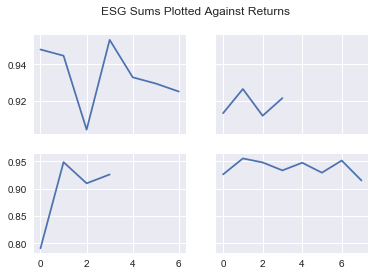

In [52]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
f.suptitle('ESG Sums Plotted Against Returns')
ax1.plot(emp_str_qtrly_roi)
ax2.plot(emp_con_qtrly_roi)
ax3.plot(env_str_qtrly_roi)
ax4.plot(env_con_qtrly_roi)

How fascinating. No clear trend in stock prices on the strengths categories, but higher concern ratings for environmental and employment practices correlate negatively with stock performance.

### Sixth, we determine what our results could mean.

OK friends, it's time to figure out what our data means, or rather, whether it means anything at all with respect to our question: do companies with higher str ESG scores and lower con ESG scores have lower stock returns than companies that perform more poorly on ESG metrics?

First, let's calculate our confidence intervals for stock performance and determine if the stock performances for companies low ESG scores fall outside the confidence intervals for the stock performance of companies with high ESG scores.

In [53]:
import math 
from scipy.stats import t
import numpy as np

In [54]:
emp_str_sum_groupby

emp_str_sum_grouping lower_conf_interval                    
                                     count      mean       std
0                    0                  12  0.948257  0.075293
1                    1                   6  0.944834  0.045003
2                  2-3                  41  0.904087  0.178948
3                  4-5                  31  0.953567  0.044308
4                  6-7                  23  0.932946  0.054780
5                 8-10                  42  0.929509  0.094077
6             Above 11                 128  0.925101  0.112919

In [55]:
labels=emp_str_sum_groupby['emp_str_sum_grouping'] 
sample_size = emp_str_sum_groupby['lower_conf_interval']['count']
standard_deviation = emp_str_sum_groupby['lower_conf_interval']['std']
mean = mean = emp_str_sum_groupby['lower_conf_interval']['mean']

def confidence_interval_for_collection(sample_size=[], standard_deviation=[], mean=[], confidence=0.95):
    degrees_freedom = [count - 1 for count in sample_size] 
    outlier_tails = (1.0 - confidence) / 2.0
    confidence_collection = [outlier_tails for _ in sample_size]
#     Why the HELL are the T-distribution values given as negative numbers??
    t_distribution_number = [-1 * t.ppf(tails, df) for tails, df in zip(confidence_collection, degrees_freedom)]

    step_1 = [std/math.sqrt(count) for std, count in zip(standard_deviation, sample_size)]
    step_2 = [step * t for step, t in zip(step_1, t_distribution_number)]

    low_end = [mean_num - step_num for mean_num, step_num in zip(mean, step_2)]
    high_end = [mean_num + step_num for mean_num, step_num in zip(mean, step_2)]

    return low_end, high_end
                                    
low_end, high_end = confidence_interval_for_collection(sample_size, standard_deviation, mean)
emp_str_confidence_interval_data = pd.concat([labels, sample_size, standard_deviation, mean], axis=1)
emp_str_confidence_interval_data['.95 confidence level min'] = low_end
emp_str_confidence_interval_data['.95 confidence level max'] = high_end
emp_str_confidence_interval_data

,emp_str_sum_grouping,count,std,mean,.95 confidence level min,.95 confidence level max
0,0,12,0.075293,0.948257,0.900419,0.996096
1,1,6,0.045003,0.944834,0.897607,0.992062
2,2-3,41,0.178948,0.904087,0.847604,0.960570
3,4-5,31,0.044308,0.953567,0.937315,0.969819
4,6-7,23,0.054780,0.932946,0.909258,0.956635
5,8-10,42,0.094077,0.929509,0.900192,0.958825
6,Above 11,128,0.112919,0.925101,0.905351,0.944851


In [56]:
labels=emp_con_sum_groupby['emp_con_sum_grouping'] 
sample_size = emp_con_sum_groupby['lower_conf_interval']['count']
standard_deviation = emp_con_sum_groupby['lower_conf_interval']['std']
mean = mean = emp_con_sum_groupby['lower_conf_interval']['mean']
 
low_end, high_end = confidence_interval_for_collection(sample_size, standard_deviation, mean)
emp_con_confidence_interval_data = pd.concat([labels, sample_size, standard_deviation, mean], axis=1)
emp_con_confidence_interval_data['.95 confidence level min'] = low_end
emp_con_confidence_interval_data['.95 confidence level max'] = high_end
emp_con_confidence_interval_data

,emp_con_sum_grouping,count,std,mean,.95 confidence level min,.95 confidence level max
0,0,14,0.091893,0.913190,0.860133,0.966248
1,1-2,104,0.121147,0.926496,0.902936,0.950056
2,3-4,52,0.156385,0.911765,0.868227,0.955303
3,5 and up,149,0.117073,0.921486,0.902533,0.940439


In [57]:
labels=env_str_sum_groupby['env_str_sum_grouping'] 
sample_size = env_str_sum_groupby['lower_conf_interval']['count']
standard_deviation = env_str_sum_groupby['lower_conf_interval']['std']
mean = mean = env_str_sum_groupby['lower_conf_interval']['mean']
 
low_end, high_end = confidence_interval_for_collection(sample_size, standard_deviation, mean)
env_str_confidence_interval_data = pd.concat([labels, sample_size, standard_deviation, mean], axis=1)
env_str_confidence_interval_data['.95 confidence level min'] = low_end
env_str_confidence_interval_data['.95 confidence level max'] = high_end
env_str_confidence_interval_data

,env_str_sum_grouping,count,std,mean,.95 confidence level min,.95 confidence level max
0,0,11,0.323166,0.791156,0.574050,1.008262
1,1-3,18,0.036978,0.948638,0.930249,0.967027
2,4-9,46,0.165861,0.909920,0.860666,0.959175
3,9 and up,84,0.078671,0.926077,0.909004,0.943149


In [58]:
labels=env_con_sum_groupby['env_con_sum_grouping'] 
sample_size = env_con_sum_groupby['lower_conf_interval']['count']
standard_deviation = env_con_sum_groupby['lower_conf_interval']['std']
mean = mean = env_con_sum_groupby['lower_conf_interval']['mean']
 
low_end, high_end = confidence_interval_for_collection(sample_size, standard_deviation, mean)
env_con_confidence_interval_data = pd.concat([labels, sample_size, standard_deviation, mean], axis=1)
env_con_confidence_interval_data['.95 confidence level min'] = low_end
env_con_confidence_interval_data['.95 confidence level max'] = high_end
env_con_confidence_interval_data

,env_con_sum_grouping,count,std,mean,.95 confidence level min,.95 confidence level max
0,0,307,0.120943,0.926293,0.912711,0.939876
1,1,2,0.034028,0.955386,0.649654,1.261118
2,2,22,0.066275,0.948107,0.918723,0.977492
3,3-4,14,0.051392,0.933587,0.903914,0.963259
4,5-7,19,0.043213,0.947539,0.926711,0.968367
5,8-12,33,0.084888,0.929378,0.899278,0.959478
6,"Above 12, below 21",33,0.056140,0.951572,0.931665,0.971478
7,Above 21,66,0.099479,0.915153,0.890698,0.939607


In all four cases, there is significant overlap between the confidence intervals for the stock performances of the companies with the lowest and the highest ESG scores. That is, we can't be confident at all that stocks from the high ESG score groups will have higher or lower returns than the stocks from the low ESG score groups.

But wait! That doesn't necessarily mean that there is no meaningful difference. The confidence intervals can overlap for two series of points whose data _still_ has a meaningful difference. To determine whether it does, we need to perform additional significance testing—in this case, a _t test_. 

[How to do the independent samples t test](https://www.youtube.com/watch?v=jyoO4i8yUag)

In [59]:
def t_test_for(num_samples_1, standard_deviation_1, mean1, num_samples_2, standard_deviation_2, mean2, confidence=0.95):
  alpha = 1 - confidence
  total_degrees_freedom = num_samples_1 + num_samples_2 - 2

  t_distribution_number = -1 * t.ppf(alpha, total_degrees_freedom)

  degrees_freedom_1 = num_samples_1 - 1
  degrees_freedom_2 = num_samples_2 - 1
  sum_of_squares_1 = (standard_deviation_1 ** 2) * degrees_freedom_1
  sum_of_squares_2 = (standard_deviation_2 ** 2) * degrees_freedom_2

  combined_variance = (sum_of_squares_1 + sum_of_squares_2) / (degrees_freedom_1 + degrees_freedom_2)
  first_dividend_addend = combined_variance/float(num_samples_1)
  second_dividend_addend = combined_variance/float(num_samples_2)

  denominator = math.sqrt(first_dividend_addend + second_dividend_addend)
  numerator = mean1 - mean2
  t_value = float(numerator)/float(denominator)

  accept_null_hypothesis = abs(t_value) < abs(t_distribution_number) #results are not significant

  return accept_null_hypothesis, t_value           

We have written a method that will tell us, firstly, whether to accept or reject the _null hypothesis_, which assumes no meaningful difference between the two sets of data we want to compare. I have named that output 'accept_null_hypothesis' because I don't love the ubiquitous use of the confounding phrase 'reject the null hypothesis' in scientifi inquiry. It's a double negative (_reject_ the _absence_ of meaningful difference), which adds an unnecessary additional piece of mental acrobatics to the (already frequently herculean) task of determining what, exactly, the scientists are trying to say in their conclusion paragraph.

We are going with _accept_ the _absence of_ meaningful difference as the variable name for two reasons. First of all, we remove the double negative this way. Second of all, accepting the null hypothesis is (or should be) the outcome of  the vast majority of scientific inquiry. Scientists, collectively, test a _whole bunch_ of stuff to see what has an effect. Most of the things tried, it turns out, don't have that effect. So our `accept_null_hypothesis` value will usually be true. When it's false, we should sit up and pay attention.

In [60]:
n1 = emp_str_confidence_interval_data['count'][0]
std1 = emp_str_confidence_interval_data['std'][0]
mean1 = emp_str_confidence_interval_data['mean'][0]

n2 = emp_str_confidence_interval_data['count'][6]
std2 = emp_str_confidence_interval_data['std'][6]
mean2 = emp_str_confidence_interval_data['mean'][6]

accept_null_hypothesis, t_value = t_test_for(n1, std1, mean1, n2, std2, mean2)
print(accept_null_hypothesis)
print(t_value)

True
0.6948157097011651


In [64]:
n1 = emp_con_confidence_interval_data['count'][0]
std1 = emp_con_confidence_interval_data['std'][0]
mean1 = emp_con_confidence_interval_data['mean'][0]

n2 = emp_con_confidence_interval_data['count'][3]
std2 = emp_con_confidence_interval_data['std'][3]
mean2 = emp_con_confidence_interval_data['mean'][3]

accept_null_hypothesis, t_value = t_test_for(n1, std1, mean1, n2, std2, mean2)
print(accept_null_hypothesis)
print(t_value)

True
-0.25751497232093584


How about that! So var, accepting the null hypothesis everywhere. It appears that we cannot meaninfgully separate the stock performance of companies on either end of the spectrum for each of their employment policy ESG scores.

In [62]:
n1 = env_str_confidence_interval_data['count'][0]
std1 = env_str_confidence_interval_data['std'][0]
mean1 = env_str_confidence_interval_data['mean'][0]

n2 = env_str_confidence_interval_data['count'][3]
std2 = env_str_confidence_interval_data['std'][3]
mean2 = env_str_confidence_interval_data['mean'][3]

accept_null_hypothesis, t_value = t_test_for(n1, std1, mean1, n2, std2, mean2)
print(accept_null_hypothesis)
print(t_value)

False
-3.2508973367060108


Ah! But check out this one! It just so happens that companies that demonstrate strengths in environmental stewardship, as measured by ESG scores, have _meaningfully better_ stock performances than companies that do not.

In [63]:
n1 = env_con_confidence_interval_data['count'][0]
std1 = env_con_confidence_interval_data['std'][0]
mean1 = env_con_confidence_interval_data['mean'][0]

n2 = env_con_confidence_interval_data['count'][7]
std2 = env_con_confidence_interval_data['std'][7]
mean2 = env_con_confidence_interval_data['mean'][7]

accept_null_hypothesis, t_value = t_test_for(n1, std1, mean1, n2, std2, mean2)
print(accept_null_hypothesis)
print(t_value)

True
0.6990102024238011


Again accepting the null hypothesis here.

#### Conclusion

On this pass, we have taken a much more thorough look at our data with respect to how well it approximates the real world and how certain we are about that approximation. 

This did not mean tacking on a test for statistical significance at the end: it meant rethinking our analysis from the very beginning, including _what our target variable would be_ (previously extrapolated annual roi, now back to mean quarterly roi) and also _how we would represent it_ (with the bottom end of the confidence interval instead of the mean itself). 

It also meant checking our results more thoroughly along the way, identifying unrealistic values in the data, understanding why those values were what they were, and replacing them with values that better approximate reality. 

Finally, it meant conducting a t test rather than eyeballing the results. 

The result here provides an excellent example of the difference between how data might be interpreted or perceived versus what it really represents. When we use the bottom of the confidence intervals, we're looking at a _lot_ of _losses_ in shareholder value. It's important to note that this isn't really what happened. It is, more accurately, a statistically derived worst-case scenario for a company that did everything that a given example company did, based on the metrics we have about how that company actually did. That is _not useful_ for predicting what the stock returns for the example company will be in the future (fun fact: trying to predict stock returns in general is not that useful, as straight-up index matching outperforms the vast majority of shrewder, prediction-based investment strategies in the long term. I don't miss our loss of predictive value because there wasn't much demonstrated value there to begin with.)

At any rate, what it _is_ useful for is accurately representing the fact that there is a lot we do not know and attempting to account for that in a comparison of stock returns relative to ESG ratings. We're not trying to predict returns by company: we're trying to determine if companies with favorable ESG scores, in aggregate, underperform on the stock market relative to companies with unfavorable ESG scores. For this, our data is useful.

And, as we've established, we don't see in this analysis a meaningful difference in most cases. In the one case where we do see a meaningful difference, the companies with favorable environmental strength ESG scores are in fact outperforming the companies with unfavorable environmental strength ESG scores. All of this bodes well for the _application_ question—can I create a socially conscious investment portfolio without sacrificing returns on my investment?

There's more to look at to get a more definitive answer to this question. But so far, what we're seeing points to _yes_. 

#### Additional Notes

While I am much happier with our process in this run of the notebook, I am highly dissatisfied with the state of the code. It's very scripty, parts of it feel repetitive, and it all has to be run in order because I reused variable names. I would call the work up to this point an _exploration phase_. If I were to ship this work for any kind of reuse, I'd like it to look nothing like this. Maybe we'll make that a follow-up post later about this notebook, or maybe we'll focus more on that in our next note book series.